<a href="https://colab.research.google.com/github/nitaymayo/My_Portfolio/blob/main/AI/Tensorflow/Convolutional_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network Using Tensorflow

Note: this notebook is for learning purposes, the models performance is not very good :) 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
# Downloading the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2022-11-28 18:45:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M  15.4MB/s    in 8.3s    

2022-11-28 18:45:29 (12.6 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



In [ ]:
# Inspect data
import os

for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

there are 2 directories and 0 images in pizza_steak
there are 2 directories and 0 images in pizza_steak/train
there are 0 directories and 750 images in pizza_steak/train/steak
there are 0 directories and 750 images in pizza_steak/train/pizza
there are 2 directories and 0 images in pizza_steak/test
there are 0 directories and 250 images in pizza_steak/test/steak
there are 0 directories and 250 images in pizza_steak/test/pizza


In [ ]:
# Getting class names
import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in data_dir.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# Visualizing function
import matplotlib.image as mpimg

def print_random_image(target_folder, target_class):
  target_dir  = target_folder + "/" + target_class

  rand_img = random.sample(os.listdir(target_dir), 1)

  img = mpimg.imread(target_dir + "/" + rand_img[0])
  plt.imshow(img)
  plt.title(f"{target_class}({img.shape})")
  plt.axis("off")

  return img


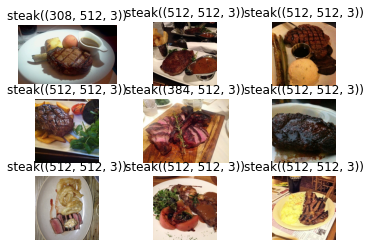

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = print_random_image("pizza_steak/train", "steak")


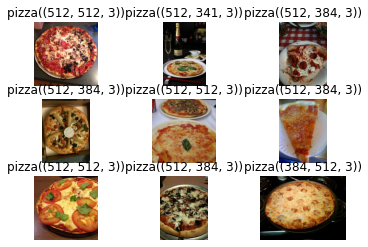

In [ ]:
for i in range(9):
  plt.subplot(3, 3, i+1)
  img = print_random_image("pizza_steak/train", "pizza")

In [ ]:
# Building datasets using ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(244, 244),
                                               class_mode="binary",
                                               seed=42)

val_data = test_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(244, 244),
                                               class_mode="binary",
                                               seed=42)



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
train_data[0][0].shape

(32, 244, 244, 3)

In [ ]:
# Buid, Compile and Train the first model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(244, 244, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model_1.summary()
model_1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["acc"])

history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=val_data,
                        validation_steps=len(val_data))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 242, 242, 10)      280       
                                                                 
 conv2d_4 (Conv2D)           (None, 240, 240, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 120, 120, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 118, 118, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 116, 116, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 58, 58, 10)       0         
 2D)                                                  

In [ ]:
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

In [ ]:
# Normelizing the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = validation_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
images, labels = train_data.next()

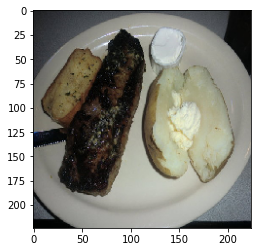

In [ ]:
plt.imshow(images[20])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Build, Compile and Train the model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_4.compile(optimizer=Adam(),
                 loss="binary_crossentropy",
                 metrics=["acc"])

model_4.summary()

history_4 = model_4.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_8 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
47/47 [==============================]

In [ ]:
# Print loss curves function of accuracy and loss
def print_loss_curves(history):
  hist = pd.DataFrame(history.history)

  epochs = range(len(hist["loss"]))

  plt.plot(epochs, hist["loss"], label="train loss")
  plt.plot(epochs, hist["val_loss"], label="val loss")
  plt.legend()
  plt.title("loss")

  plt.figure()
  plt.plot(epochs, hist["acc"], label="train acc")
  plt.plot(epochs, hist["val_acc"], label="val acc")
  plt.legend()
  plt.title("accuracy")


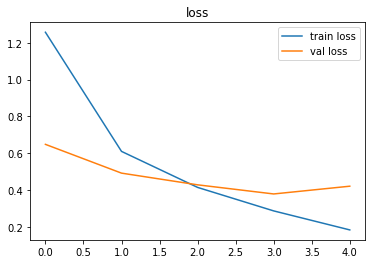

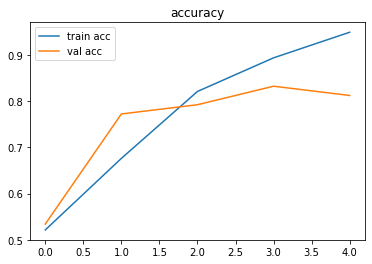

In [ ]:
print_loss_curves(history_4)

In [ ]:
# Build, Compile and Train the model
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["acc"])

history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 199ms/step - loss: 0.6088 - acc: 0.6673 - val_loss: 0.4148 - val_acc: 0.8060
Epoch 2/5
47/47 [==============================] - 9s 194ms/step - loss: 0.4098 - acc: 0.8173 - val_loss: 0.3560 - val_acc: 0.8500
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3895 - acc: 0.8340 - val_loss: 0.4045 - val_acc: 0.7980
Epoch 4/5
47/47 [==============================] - 9s 195ms/step - loss: 0.3779 - acc: 0.8500 - val_loss: 0.3073 - val_acc: 0.8820
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.3488 - acc: 0.8540 - val_loss: 0.2921 - val_acc: 0.8860


In [ ]:
model_5.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 26, 26, 10)      

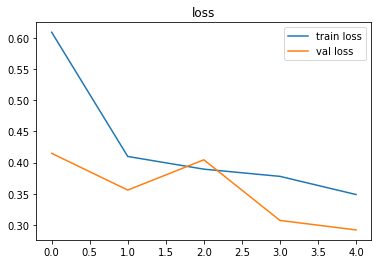

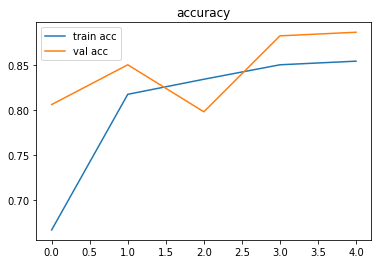

In [ ]:
print_loss_curves(history_5)

In [ ]:
# Creating data augmentation using ImageDataGenerator
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Augmenting the data
train_data_aug = train_datagen_augmented.flow_from_directory(train_dir,
                                                             target_size=(224,224),
                                                             class_mode="binary",
                                                             shuffle=False)
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
# Inspecting the data
images_aug, labels_aug = train_data_aug.next()
images, labels = train_data.next()

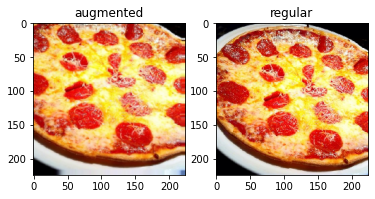

In [ ]:
rand = random.randint(0, 32)
plt.subplot(1, 2, 1)
plt.imshow(images_aug[rand])
plt.title("augmented")

plt.subplot(1, 2, 2)
plt.title("regular")
plt.imshow(images[rand])

In [ ]:
# Build, Compile and Train the model with augmented data
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["acc"])

history_6 = model_6.fit(train_data_aug,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 23s 485ms/step - loss: 0.7914 - acc: 0.5353 - val_loss: 0.6772 - val_acc: 0.6980
Epoch 2/5
47/47 [==============================] - 23s 485ms/step - loss: 0.6821 - acc: 0.6000 - val_loss: 0.6326 - val_acc: 0.7120
Epoch 3/5
47/47 [==============================] - 23s 481ms/step - loss: 0.6902 - acc: 0.5600 - val_loss: 0.6621 - val_acc: 0.5400
Epoch 4/5
47/47 [==============================] - 24s 503ms/step - loss: 0.6430 - acc: 0.6280 - val_loss: 0.7159 - val_acc: 0.5200
Epoch 5/5
47/47 [==============================] - 22s 478ms/step - loss: 0.6662 - acc: 0.5820 - val_loss: 0.5500 - val_acc: 0.7340


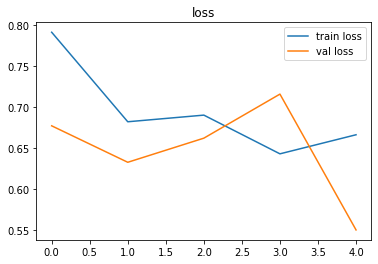

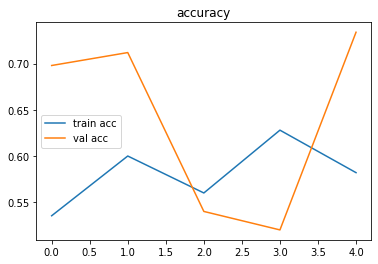

In [ ]:
print_loss_curves(history_6)

In [ ]:
train_data_aug_shuff = train_datagen_augmented.flow_from_directory(train_dir,
                                                             target_size=(224,224),
                                                             class_mode="binary",
                                                             shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Build, Compile and Train the model with shuffled data
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["acc"])

history_7 = model_7.fit(train_data_aug_shuff,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
47/47 [==============================] - 25s 514ms/step - loss: 0.6807 - acc: 0.5587 - val_loss: 0.5945 - val_acc: 0.7240
Epoch 2/5
47/47 [==============================] - 24s 512ms/step - loss: 0.5524 - acc: 0.7147 - val_loss: 0.3586 - val_acc: 0.8600
Epoch 3/5
47/47 [==============================] - 23s 480ms/step - loss: 0.4736 - acc: 0.7853 - val_loss: 0.3416 - val_acc: 0.8660
Epoch 4/5
47/47 [==============================] - 22s 475ms/step - loss: 0.4607 - acc: 0.7793 - val_loss: 0.3291 - val_acc: 0.8660
Epoch 5/5
47/47 [==============================] - 22s 472ms/step - loss: 0.4617 - acc: 0.7760 - val_loss: 0.3936 - val_acc: 0.8240


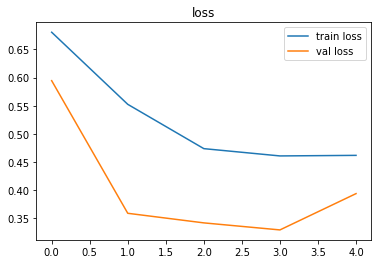

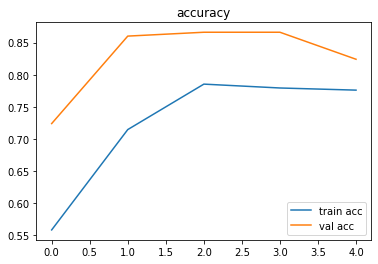

In [ ]:
# Getting much smoother loss curves
print_loss_curves(history_7)

Epoch 1/10
47/47 [==============================] - 25s 516ms/step - loss: 0.6789 - acc: 0.5567 - val_loss: 0.5523 - val_acc: 0.7940
Epoch 2/10
47/47 [==============================] - 23s 485ms/step - loss: 0.5711 - acc: 0.7140 - val_loss: 0.5011 - val_acc: 0.8040
Epoch 3/10
47/47 [==============================] - 24s 512ms/step - loss: 0.5004 - acc: 0.7767 - val_loss: 0.3985 - val_acc: 0.8460
Epoch 4/10
47/47 [==============================] - 23s 487ms/step - loss: 0.4665 - acc: 0.7953 - val_loss: 0.3993 - val_acc: 0.8480
Epoch 5/10
47/47 [==============================] - 23s 485ms/step - loss: 0.5003 - acc: 0.7747 - val_loss: 0.3622 - val_acc: 0.8720
Epoch 6/10
47/47 [==============================] - 23s 483ms/step - loss: 0.4714 - acc: 0.7807 - val_loss: 0.4414 - val_acc: 0.7920
Epoch 7/10
47/47 [==============================] - 24s 503ms/step - loss: 0.4557 - acc: 0.7893 - val_loss: 0.3986 - val_acc: 0.8400
Epoch 8/10
47/47 [==============================] - 24s 508ms/step - 

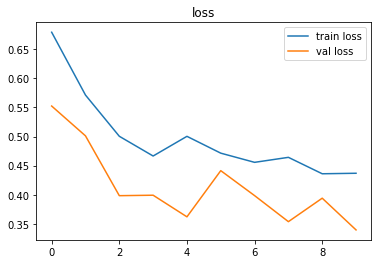

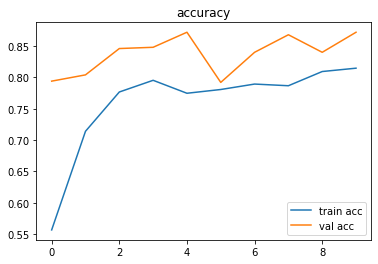

In [ ]:
# Build, Compile and Train the model using more Conv2D layers
model_8 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_8.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=["acc"])

history_8 = model_8.fit(train_data_aug_shuff,
                        epochs=10,
                        validation_data=test_data)
print_loss_curves(history_8)

--2022-11-28 19:06:37--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.008s  

2022-11-28 19:06:37 (247 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



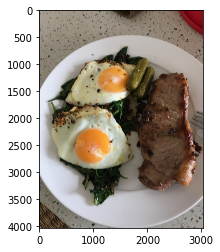

In [ ]:
# Importing an image to check the predictions
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0)
expanded_steak

<tf.Tensor: shape=(1, 4032, 3024, 3), dtype=uint8, numpy=
array([[[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],

        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],

        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],

        ...,

        [[154, 132, 109],
         [142, 122,  98],
         [101,  80,  59],
         ...,
         [165, 154, 148],
         [152, 141, 135],
         [140, 129, 123]],

        [[141, 119,  95],
         [139, 117,  93],
         [106,  86,  62],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],

        [[148, 127, 100],
         [149, 127, 103],
         [114,  

In [ ]:
def load_and_prep_img(filename, img_shape=224):
  """
  Reads an image and prepares it to be used in a model
  """

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img, size=(img_shape, img_shape))

  img = img/255.

  img = tf.expand_dims(img, axis=0)
  
  return img

load_and_prep_img("03-steak.jpeg")

In [ ]:
# Predicting on the inported image
pred = model_7.__call__(load_and_prep_img("03-steak.jpeg"))
print(pred)
pred = tf.math.round(pred).numpy()
print(pred)

tf.Tensor([[0.95318407]], shape=(1, 1), dtype=float32)
[[1.]]


In [ ]:
model_8.input_shape

(None, 224, 224, 3)

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Gets a model and a img, makes a prediction with the model and plots it out using pyplot

  Args:
  model: model to use for the prediction
  filename: image to predict location
  class_names: the names of the predicted classes

  Returns:
  Plot of the image and the prediction of it according to the provided model
  """
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img, size=(224, 224))

  img = img/255.

  plt.imshow(img)

  img = tf.expand_dims(img, axis=0)

  pred = model.__call__(img)
  print(pred)
  if len(class_names) > 2:
    print("argmax:" + tf.argmax(pred))
    pred = class_names[tf.argmax(pred)]
  else:
    pred = class_names[int(tf.math.round(pred))]

  
  plt.title(f"prediction: {pred}")




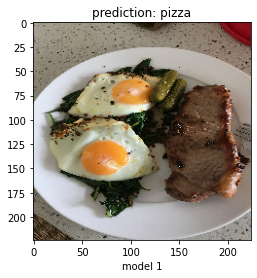

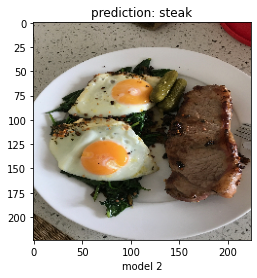

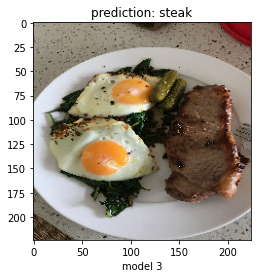

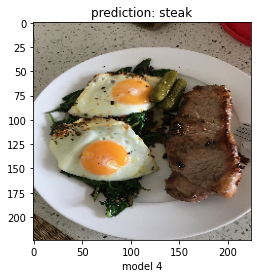

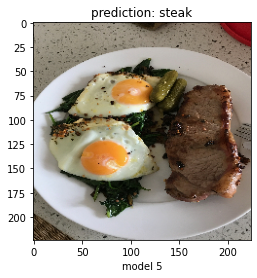

<Figure size 432x288 with 0 Axes>

In [ ]:
models = [model_4, model_5, model_6, model_7, model_8]

for i, model in enumerate(models):
  pred_and_plot(model, "03-steak.jpeg")
  plt.xlabel(f"model {i+1}")
  plt.figure()

## Using the full data(10 classes)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
def print_loss_curves(history):
  hist = pd.DataFrame(history.history)

  epochs = range(len(hist["loss"]))

  plt.plot(epochs, hist["loss"], label="train loss")
  plt.plot(epochs, hist["val_loss"], label="val loss")
  plt.legend()
  plt.title("loss")

  plt.figure()
  plt.plot(epochs, hist["acc"], label="train acc")
  plt.plot(epochs, hist["val_acc"], label="val acc")
  plt.legend()
  plt.title("accuracy")

In [ ]:
# Getting the data
import zipfile

! wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2022-12-05 18:33:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.135.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  84.1MB/s    in 6.9s    

2022-12-05 18:34:06 (71.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Getting classes names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))

class_names


array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
# Visualizing the data
import random
def view_random_image(target_dir, target_class):
  class_dir = str(target_dir) + "/" + target_class

  img = random.choice(os.listdir(class_dir))
  img = plt.imread(class_dir + "/" + img)
  plt.title(target_class)
  plt.xlabel(img.shape)
  plt.imshow(img)
  return img


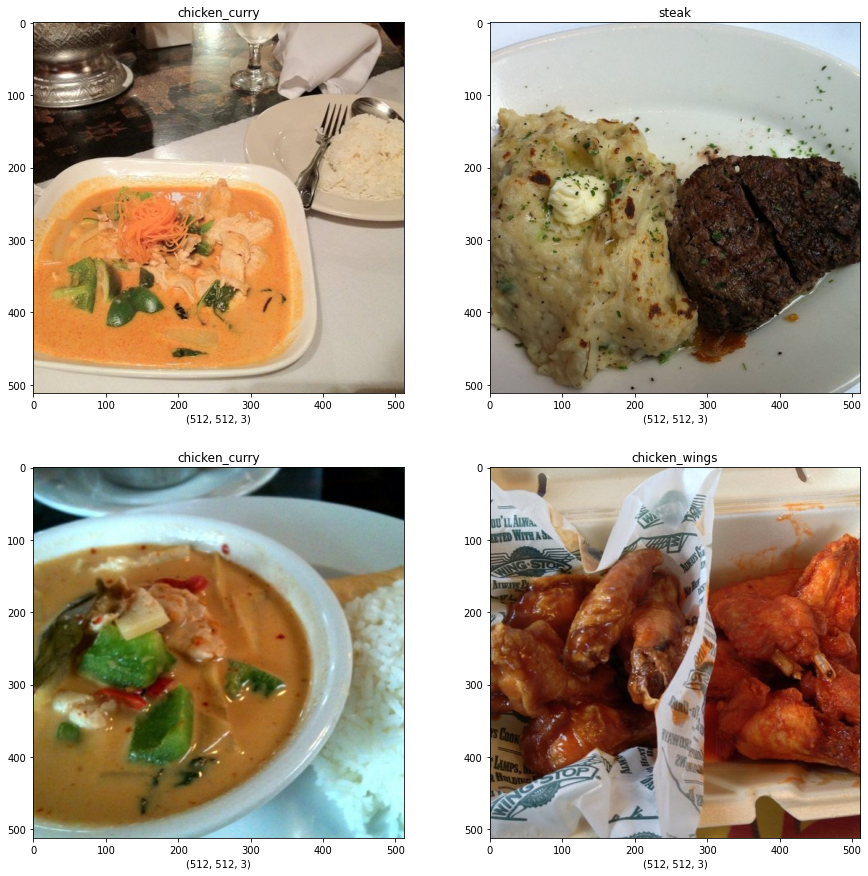

In [ ]:
import random
plt.figure(figsize=(15, 15))
for i in range(4):
  plt.subplot(2, 2, i+1)
  img = view_random_image(data_dir, random.choice(class_names))

In [ ]:
# Creating datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1/255.)

train_data = data_gen.flow_from_directory(train_dir,
                                          target_size=(224, 224),
                                          batch_size=32,
                                          class_mode="categorical")


test_data = data_gen.flow_from_directory(test_dir,
                                          target_size=(224, 224),
                                          batch_size=32,
                                          class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [ ]:
# Inspecting the shapes
x, y = train_data.next()
x.shape, y.shape

((32, 224, 224, 3), (32, 10))

In [ ]:
# Build, Compile and Train the model
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")   
])

model_9.summary()

model_9.compile(optimizer=Adam(),
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
                metrics=["acc"])

history_9 = model_9.fit(train_data, epochs=5, validation_data=test_data)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

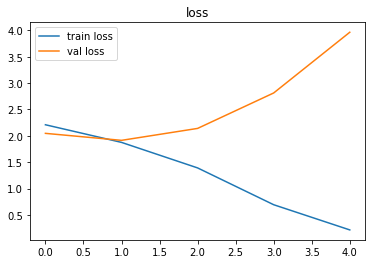

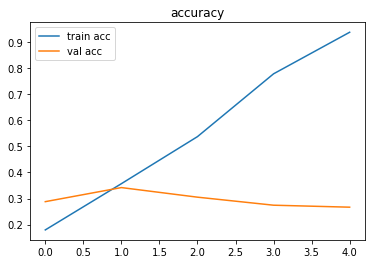

In [ ]:
print_loss_curves(history_9)

In [ ]:
y_label = test_data.labels

In [ ]:
test_data[0][1][0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Getting model predictions to evaluate later
y_pred = model_9.predict(test_data, verbose=0)

In [ ]:
y_pred2 = tf.math.argmax(y_pred)

In [ ]:
y_label.shape

(2500,)

In [ ]:
y_pred = tf.math.argmax(y_pred, axis=1)

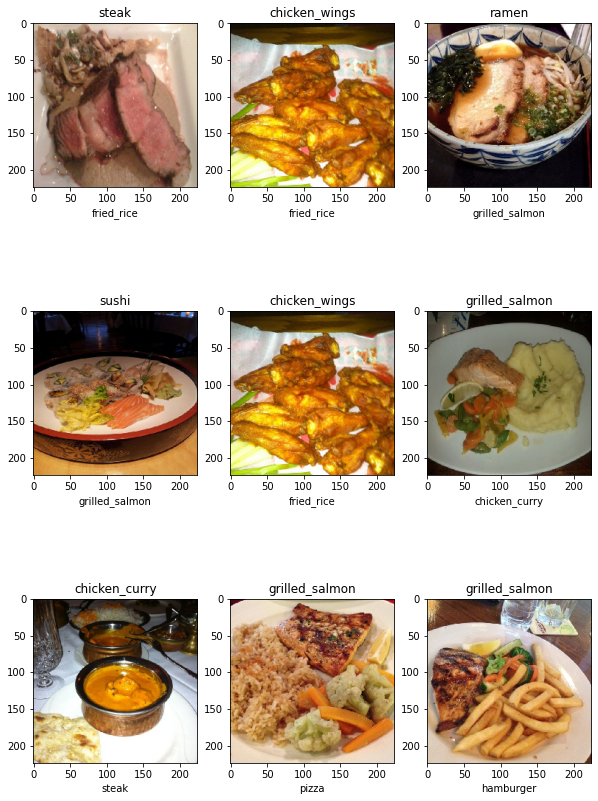

In [ ]:
# Plotting the predictions, Truth on top, Prediction on bottom
plt.figure(figsize=(10,15))
for i in range(9):
  rand = random.randint(0, 31)
  plt.subplot(3,3,i+1)
  plt.imshow(test_data[0][0][rand])
  plt.title(class_names[tf.math.argmax(test_data[0][1][rand])])
  plt.xlabel(class_names[y_pred[rand]])

In [ ]:
# Function to plot nice and visual confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes="", figsize=(10, 10), text_size=10):
  # Create the confusion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

 
  fig, ax = plt.subplots(figsize=figsize)
  # Create a matrix plot
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

 
  if list(classes):
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
        xlabel="Predicted Label",
        ylabel="True Label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels, 
        yticklabels=labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)

  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
            horizontalalignment="center",
            color="white" if cm[i, j] > threshold else "black",
            size=text_size)

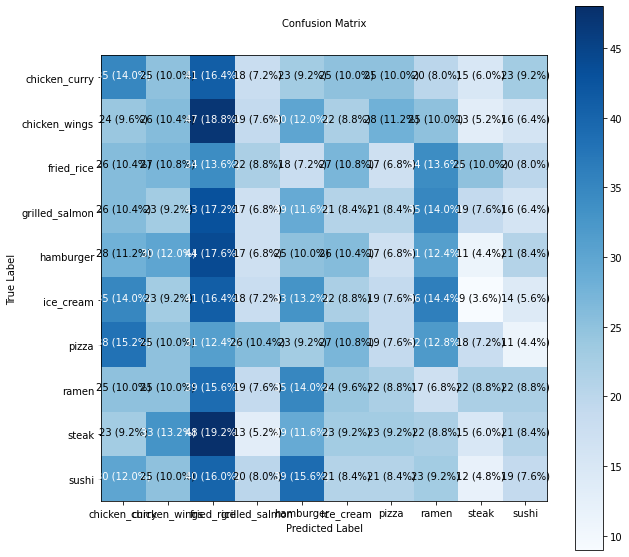

In [ ]:
make_confusion_matrix(y_label, y_pred, classes=class_names)

In [ ]:
# Creating augmented datasets
from sklearn.utils import shuffle
data_gen_augmanted = ImageDataGenerator(rescale=1/255.,
                                        rotation_range=0.2,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        zoom_range=0.2,
                                        channel_shift_range=0.2,
                                        horizontal_flip=True
                                        )

train_data_aug = data_gen_augmanted.flow_from_directory(train_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        class_mode="categorical")

Found 7500 images belonging to 10 classes.


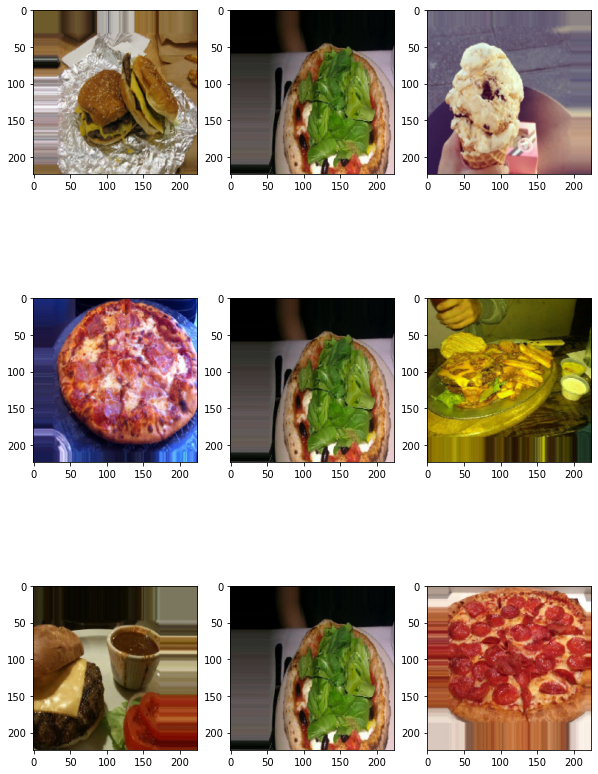

In [ ]:
# Visualizing the augmentation
x, y = train_data_aug.next()
plt.figure(figsize=(10, 15))
for i in range(9):
  rand = random.randint(0, 31)
  plt.subplot(3,3,i+1)
  plt.imshow(x[rand])

In [ ]:
# Training a model same as model 9 but on augmented data
model_10 = tf.keras.models.clone_model(model_9)

model_10.compile(loss="categorical_crossentropy",
                 optimizer=Adam(),
                 metrics=["acc"])

In [ ]:
history_10 = model_10.fit(train_data_aug,
                          epochs=5,
                          validation_data=test_data)

Epoch 1/5
235/235 [==============================] - 121s 511ms/step - loss: 2.1804 - acc: 0.1987 - val_loss: 2.0943 - val_acc: 0.2236
Epoch 2/5
235/235 [==============================] - 119s 506ms/step - loss: 2.0645 - acc: 0.2597 - val_loss: 1.9008 - val_acc: 0.3388
Epoch 3/5
235/235 [==============================] - 117s 497ms/step - loss: 1.9954 - acc: 0.2932 - val_loss: 1.8415 - val_acc: 0.3548
Epoch 4/5
235/235 [==============================] - 128s 544ms/step - loss: 1.9559 - acc: 0.3220 - val_loss: 1.8725 - val_acc: 0.3576
Epoch 5/5
235/235 [==============================] - 117s 498ms/step - loss: 1.9149 - acc: 0.3357 - val_loss: 1.7369 - val_acc: 0.4112


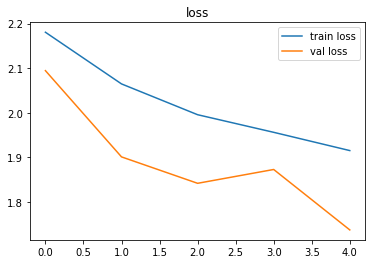

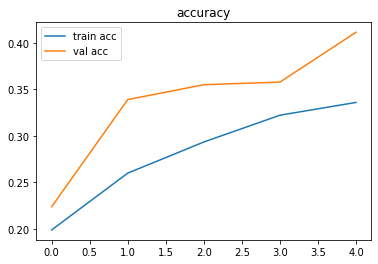

In [ ]:
print_loss_curves(history_10)

In [ ]:
# Importing custom image to test the predictions
! wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2022-12-05 18:51:55--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1725178 (1.6M) [image/jpeg]
Saving to: ‘03-sushi.jpeg’

03-sushi.jpeg       100%[===================>]   1.64M  --.-KB/s    in 0.04s   

2022-12-05 18:51:56 (43.4 MB/s) - ‘03-sushi.jpeg’ saved [1725178/1725178]



In [ ]:
# Function to test a model prediction on a custom image
def pred_and_plot(model, filename, class_names=class_names):
  
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img)

  img = tf.image.resize(img, size=(224, 224))

  img = img/255.

  plt.imshow(img)

  img = tf.expand_dims(img, axis=0)

  pred = tf.squeeze(model.__call__(img))
  if len(class_names) > 2:
    print("argmax:", tf.math.argmax(pred))
    pred = class_names[tf.argmax(pred)]
  else:
    pred = class_names[int(tf.math.round(pred))]

  
  plt.title(f"prediction: {pred}")




argmax: tf.Tensor(6, shape=(), dtype=int64)


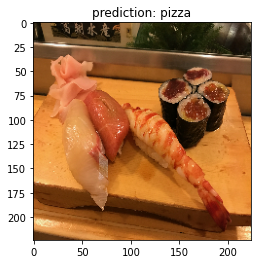

In [ ]:
pred_and_plot(model_10, "/content/03-sushi.jpeg", class_names=class_names)